In [55]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
import seaborn as sn

df=pd.read_csv("climate_action_data.csv")
df.head(10)

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004
5,SEN-1005,2025-01-06,20.92,7.08,26.8,66.3,Beans,68.0,27.8,IMG-2005
6,SEN-1006,2025-01-07,14.07,7.77,19.1,51.9,Maize,64.3,10.5,IMG-2006
7,SEN-1007,2025-01-08,70.63,7.74,31.6,43.1,Lettuce,41.0,6.4,IMG-2007
8,SEN-1008,2025-01-09,52.08,6.08,22.0,89.3,Tomatoes,67.8,11.4,IMG-2008
9,SEN-1009,2025-01-10,59.57,4.9,27.2,57.2,Maize,35.2,18.2,IMG-2009


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB


In [57]:
df.dtypes
df.isnull().sum()

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [ ]:
#Converting some data to numeric
numeric_values=['Soil_Moisture(%)','Soil_pH','Temperature(C)','Humidity(%)','Fertilizer_Recommended(kg/ha)','Irrigation_Recommended(mm)']
for col in numeric_values:
     if col in df.columns:
      df[col] = pd.to_numeric(df[col], errors='coerce') #Convert to numeric, coercing errors to NaN
      #fill NaN values with the median
      df[col] = df[col].fillna(df[col].median())

In [62]:
#CHeck for datatypes after conversion
df.dtypes

Sensor_ID                         object
Date                              object
Soil_Moisture(%)                 float64
Soil_pH                          float64
Temperature(C)                   float64
Humidity(%)                      float64
Crop_Type                         object
Fertilizer_Recommended(kg/ha)    float64
Irrigation_Recommended(mm)       float64
Drone_Image_ID                    object
dtype: object

In [ ]:
#Columns with missing data 
df.isnull().sum()

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [65]:
print(f"Number of dupicated rows:{df.duplicated().sum()}")
print(f"Shape of Dataset:{df.shape}")

Number of dupicated rows:111
Shape of Dataset:(913, 10)


In [ ]:
#Handling duplicates
df.drop_duplicates(keep='first',inplace=True)
print(f"Number of dupicated rows after:{df.duplicated().sum()}")
print(f"Shape of dataset after:{df.shape}")


Number of dupicated rows after:0
Shape of dataset after:(802, 10)


In [ ]:
#Converting Date column to Data type
df['Date']=pd.to_datetime(df['Date'], errors='coerce')
df['Date'].isnull().sum()

4

In [ ]:
#Filling in missing values in Date and Crop_type
on_numeric_cols = ['Date','Crop_Type']
for col in non_numeric_cols:
    if col in df.columns:
        mode_value = df[col].mode()
        if not mode_value.empty:
            df[col] = df[col].fillna(mode_value[0]) 

In [75]:
df.isnull().sum()

Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

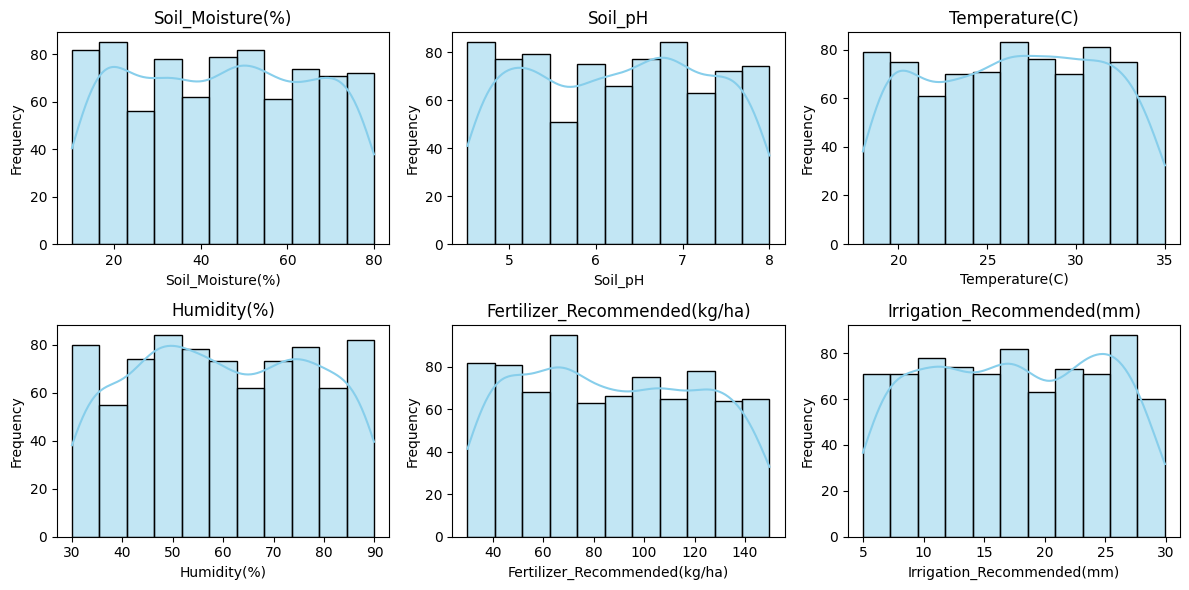

In [89]:
#Histogram


fig, axs = plt.subplots(2, 3, figsize=(12, 6))

columns = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']

axs = axs.flatten()

for i, col in enumerate(columns):
    sn.histplot(data=df, x=col, kde=True, ax=axs[i], color='skyblue', edgecolor='black')
    axs[i].set_title(col)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()





In [87]:
df.describe()

,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm)
count,802,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000
mean,2026-02-02 07:57:36.359102208,44.766353,6.249084,26.461471,60.033292,87.460723,17.392269
min,2025-01-01 00:00:00,10.350000,4.520000,18.000000,30.000000,30.000000,5.000000
25%,2025-07-16 06:00:00,26.947500,5.330000,22.300000,46.025000,57.925000,11.300000
50%,2026-02-01 12:00:00,45.230000,6.285000,26.600000,59.500000,85.950000,17.400000
75%,2026-08-22 18:00:00,62.555000,7.080000,30.600000,75.275000,117.675000,23.700000
max,2027-03-11 00:00:00,79.980000,8.000000,35.000000,89.900000,149.700000,29.900000
std,NaN,20.460694,1.021579,4.863302,17.416061,34.765497,7.140127


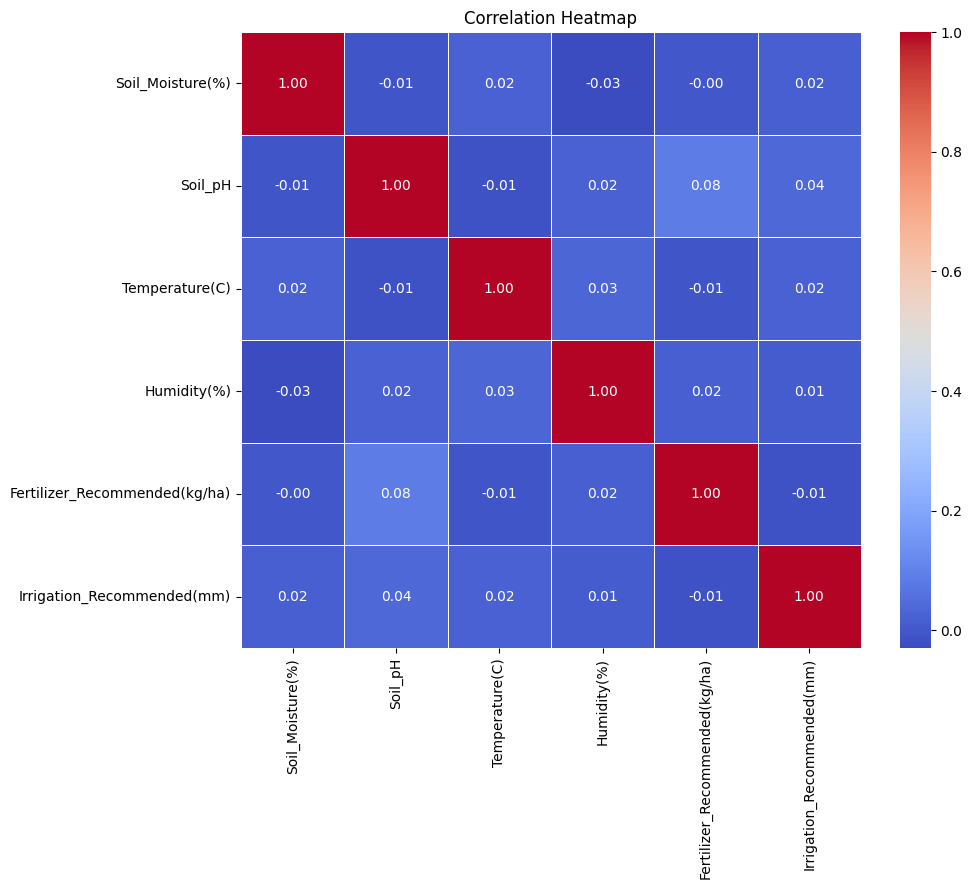

In [91]:
# Compute correlation matrix
corr = df.corr(numeric_only=True)

# Create heatmap
plt.figure(figsize=(10, 8))
sn.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#crop type with the highest average soil moisture
df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().sort_values(ascending=False)


Crop_Type
Wheat       47.356449
Maize       44.953581
Beans       44.394375
Tomatoes    43.817946
Lettuce     42.984868
Name: Soil_Moisture(%), dtype: float64

In [99]:
avg_temp_by_crop = df.groupby('Crop_Type')['Temperature(C)'].mean()
avg_temp_by_crop

Crop_Type
Beans       26.855921
Lettuce     26.162252
Maize       27.010323
Tomatoes    26.170833
Wheat       26.171591
Name: Temperature(C), dtype: float64

In [100]:
hot_crops = avg_temp_by_crop[avg_temp_by_crop > 30]
print(hot_crops)


Series([], Name: Temperature(C), dtype: float64)


 INSIGHTS AND RECOMMENDATIONS
 1.Soil_pH followed by humidity affect Fertilizer recommendations the highest with correlations of 0.08 and 0.02 respectivley.
 2.Wheat has the highest soil moisture of  47.356449%.
 3.From the analysis of average temperatures per crop, no crop type in the dataset is currently experiencing average temperatures above 30°C. Therefore, no immediate irrigation adjustments are necessary based on temperature-related stress. However, continued monitoring is advised, especially for crops like maize and beans that are closer to the 27°C mark.

In [107]:
df.to_csv('cleaned_precision_agriculture_data.csv', index=False)
